By Drilon & Chia-Hua

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import re

In [17]:
with open("data/companies.csv", encoding="utf-8") as corpus_file:
    corpus = corpus_file.read()
    corpus = re.sub(r'[^0-9a-zA-Z\\/@+\-/\n:,|#]+', '', corpus)
    corpus_length = len(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))
print(corpus[:120])

Loaded a corpus of 2385993 characters
HashplayInc
NewIncentives
GrabJobs
MediBookr
MelissaWithLoveco
Starting11
TheCarShareGuy
AllahabadBank
Anlaiye
AnyTimeLo


In [18]:
chars = sorted(list(set(corpus)))
print(chars)
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

['\n', '#', '+', ',', '-', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|']
Our corpus contains 72 unique characters.


In [19]:
print(encoding)
print(decoding)

{'\n': 0, '#': 1, '+': 2, ',': 3, '-': 4, '/': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, ':': 16, '@': 17, 'A': 18, 'B': 19, 'C': 20, 'D': 21, 'E': 22, 'F': 23, 'G': 24, 'H': 25, 'I': 26, 'J': 27, 'K': 28, 'L': 29, 'M': 30, 'N': 31, 'O': 32, 'P': 33, 'Q': 34, 'R': 35, 'S': 36, 'T': 37, 'U': 38, 'V': 39, 'W': 40, 'X': 41, 'Y': 42, 'Z': 43, '\\': 44, 'a': 45, 'b': 46, 'c': 47, 'd': 48, 'e': 49, 'f': 50, 'g': 51, 'h': 52, 'i': 53, 'j': 54, 'k': 55, 'l': 56, 'm': 57, 'n': 58, 'o': 59, 'p': 60, 'q': 61, 'r': 62, 's': 63, 't': 64, 'u': 65, 'v': 66, 'w': 67, 'x': 68, 'y': 69, 'z': 70, '|': 71}
{0: '\n', 1: '#', 2: '+', 3: ',', 4: '-', 5: '/', 6: '0', 7: '1', 8: '2', 9: '3', 10: '4', 11: '5', 12: '6', 13: '7', 14: '8', 15: '9', 16: ':', 17: '@', 18: 'A', 19: 'B', 20: 'C', 21: 'D', 22: 'E', 23: 'F', 24: 'G', 25: 'H', 26: 'I', 27: 'J', 28: 'K', 29: 'L', 30: 'M', 31: 'N', 32: 'O', 33: 'P', 34: 'Q', 35: 'R', 36: 'S', 37: 'T', 38: 'U', 39: 'V', 40: 'W'

In [20]:
sequence_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - sequence_length, skip):
    sentence = corpus[i:i + sequence_length]
    next_char = corpus[i + sequence_length]
    X_data.append([encoding[char] for char in sentence])
    y_data.append(encoding[next_char])

num_sentences = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_sentences, sequence_length))

Sliced our corpus into 795328 sentences of length 10


In [21]:
print('Encoded data[0]  : {}'.format(X_data[0]))
print('Decoded data[0]  : {}'.format([decoding[idx] for idx in X_data[0]]))
print('Target of data[0]: {}'.format(decoding[y_data[0]]))

Encoded data[0]  : [25, 45, 63, 52, 60, 56, 45, 69, 26, 58]
Decoded data[0]  : ['H', 'a', 's', 'h', 'p', 'l', 'a', 'y', 'I', 'n']
Target of data[0]: c


In [31]:
X = np.zeros((num_sentences, sequence_length, num_chars), dtype=bool)
y = np.zeros((num_sentences, num_chars), dtype=bool)
for i, sentence in enumerate(X_data):
    for t, encoded_char in enumerate(sentence):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

print("Sanity check y. Dimension: {0} # Sentences: {1} Characters in corpus: {2}"
      .format(y.shape, num_sentences, len(chars)))
print("Sanity check X. Dimension: {0} Sentence length: {1}"
      .format(X.shape, sequence_length))

Sanity check y. Dimension: (795328, 72) # Sentences: 795328 Characters in corpus: 72
Sanity check X. Dimension: (795328, 10, 72) Sentence length: 10


In [23]:
simple = keras.models.Sequential()
simple.add(keras.layers.SimpleRNN(64, input_shape=(sequence_length, num_chars),
                                 return_sequences=False))
simple.add(keras.layers.Dense(num_chars))
simple.add(keras.layers.Activation('softmax'))
simple.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
simple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                8768      
                                                                 
 dense_1 (Dense)             (None, 72)                4680      
                                                                 
 activation_1 (Activation)   (None, 72)                0         
                                                                 
Total params: 13,448
Trainable params: 13,448
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6214/6214 [==============================] - 96s 15ms/step - loss: 2.6948 - accuracy: 0.2793
Epoch 2/10
6214/6214 [==============================] - 138s 22ms/step - loss: 2.4448 - accuracy: 0.3364
Epoch 3/10
6214/6214 [==============================] - 146s 23ms/step - loss: 2.3675 - accuracy: 0.3563
Epoch 4/10
6214/6214 [==============================] - 130s 21ms/step - loss: 2.3241 - accuracy: 0.3682
Epoch 5/10
6214/6214 [==============================] - 126s 20ms/step - loss: 2.2950 - accuracy: 0.3754
Epoch 6/10
6214/6214 [==============================] - 125s 20ms/step - loss: 2.2738 - accuracy: 0.3807
Epoch 7/10
6214/6214 [==============================] - 92s 15ms/step - loss: 2.2577 - accuracy: 0.3847
Epoch 8/10
6214/6214 [==============================] - 90s 14ms/step - loss: 2.2452 - accuracy: 0.3881
Epoch 9/10
6214/6214 [==============================] - 89s 14ms/step - loss: 2.2359 - accuracy: 0.3903
Epoch 10/10
6214/6214 [==============================] - 88

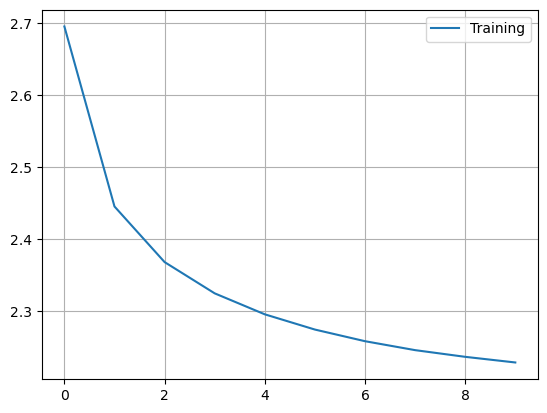

In [24]:
simple_log = simple.fit(X, y, epochs=10, batch_size=128)
plt.plot(simple_log.history['loss'], label='Training')
plt.legend()
plt.grid()

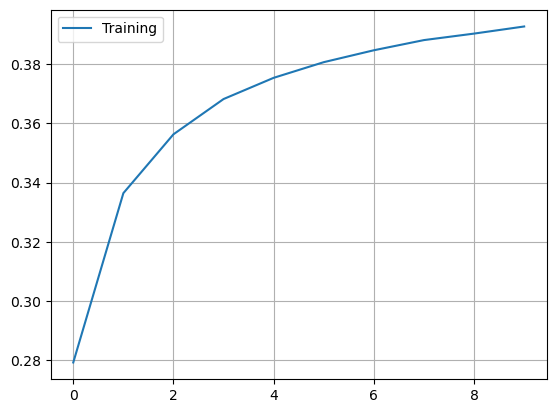

In [29]:
plt.plot(simple_log.history['accuracy'], label='Training')
plt.legend()
plt.grid()

In [28]:
def make_seed(seed_phrase=""):
    if seed_phrase:  # make sure the seed has the right length
        phrase_length = len(seed_phrase)
        pattern = ""
        for i in range (0, sequence_length):
            pattern += seed_phrase[i % phrase_length]
    else:            # sample randomly the seed from corpus
        seed = random.randint(0, corpus_length - sequence_length)
        pattern = corpus[seed:seed + sequence_length]
    return pattern

seed_pattern = make_seed("Facebook")
print("seed = " + seed_pattern)

X = np.zeros((1, sequence_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(10):
    output_prob = simple.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(seed_pattern+generated_text)

seed = Facebookan
FacebookanTechnologi


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                35072     
                                                                 
 dense_3 (Dense)             (None, 72)                4680      
                                                                 
 activation_3 (Activation)   (None, 72)                0         
                                                                 
Total params: 39,752
Trainable params: 39,752
Non-trainable params: 0
_________________________________________________________________


2024-05-14 15:19:22.333339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 15:19:22.334747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 15:19:22.336264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-05-14 15:19:23.195367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 15:19:23.197336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 15:19:23.198907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6214/6214 [==============================] - 191s 30ms/step - loss: 2.7204 - accuracy: 0.2654
Epoch 2/10
6214/6214 [==============================] - 171s 28ms/step - loss: 2.3478 - accuracy: 0.3593
Epoch 3/10
6214/6214 [==============================] - 219s 35ms/step - loss: 2.2382 - accuracy: 0.3901
Epoch 4/10
6214/6214 [==============================] - 237s 38ms/step - loss: 2.1805 - accuracy: 0.4061
Epoch 5/10
6214/6214 [==============================] - 246s 40ms/step - loss: 2.1421 - accuracy: 0.4169
Epoch 6/10
6214/6214 [==============================] - 206s 33ms/step - loss: 2.1143 - accuracy: 0.4246
Epoch 7/10
6214/6214 [==============================] - 182s 29ms/step - loss: 2.0930 - accuracy: 0.4300
Epoch 8/10
6214/6214 [==============================] - 181s 29ms/step - loss: 2.0762 - accuracy: 0.4344
Epoch 9/10
6214/6214 [==============================] - 228s 37ms/step - loss: 2.0619 - accuracy: 0.4380
Epoch 10/10
6214/6214 [==============================] - 267s 43ms

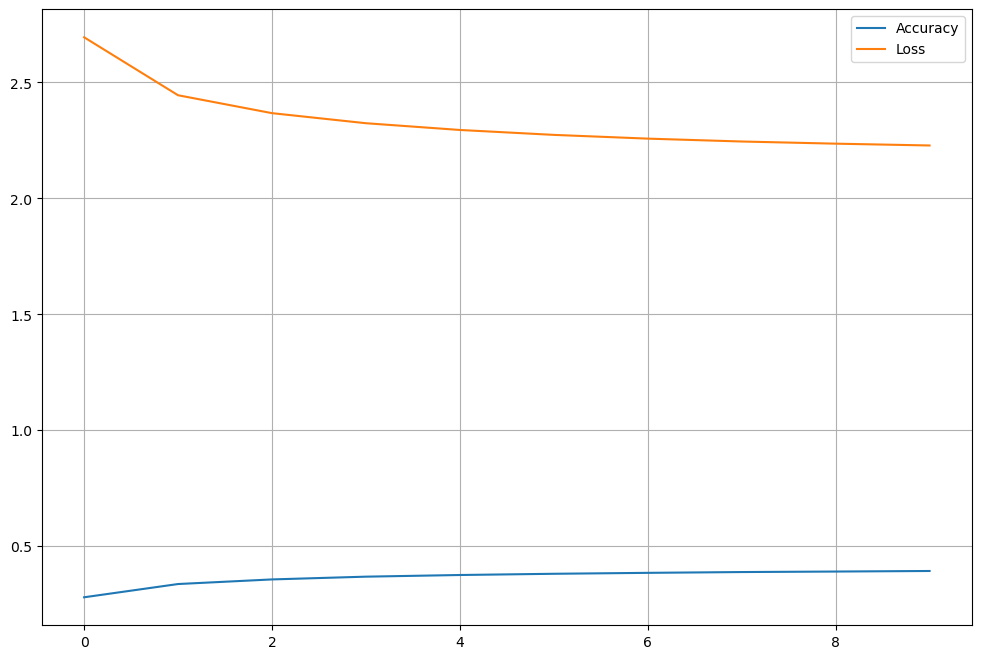

In [32]:
lstm = keras.models.Sequential()
lstm.add(keras.layers.LSTM(64, input_shape=(sequence_length, num_chars),
                                  return_sequences=False))
lstm.add(keras.layers.Dense(num_chars))
lstm.add(keras.layers.Activation('softmax'))
lstm.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
lstm.summary()

lstm_log = lstm.fit(X, y, epochs=10, batch_size=128)

fig, axes = plt.subplots(figsize=(12,8))
axes.plot(simple_log.history['accuracy'], label='Accuracy')
axes.plot(simple_log.history['loss'], label='Loss')

plt.legend()
plt.grid()

KeyError: 'val_loss'

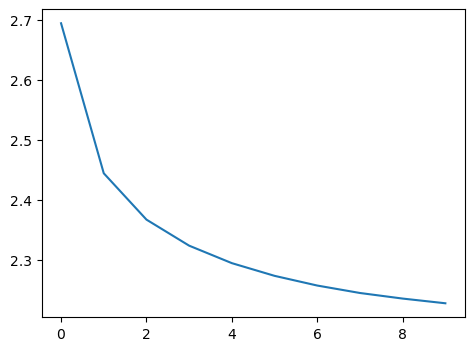

In [34]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(simple_log.history['loss'], label='Training Loss')
plt.plot(simple_log.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(simple_log.history['accuracy'], label='Training Accuracy')
plt.plot(simple_log.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
seed_pattern = make_seed("Facebook")
print("seed = " + seed_pattern)

X = np.zeros((1, sequence_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(10):
    output_prob = lstm.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(seed_pattern+generated_text)

seed = FacebookFa


2024-05-14 15:55:31.838878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 15:55:31.841047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 15:55:31.842788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

FacebookFabsan
Penst


Despite using a model with LSTM layers, the performance was poor, with very low accuracy and meaningless outputs.
Issues Identified:
   - Low Accuracy: The model struggled to learn the patterns in the data.
   - Incoherent Output: Generated names were often random and nonsensical.

Our Model with Dense or LSTM layers didn't generate meaningful startup names, showing low accuracy and poor outputs. We think improving data preprocessing and increasing model complexity will help. Exploring advanced architectures like GRU or Transformers might also give us better results.